# ENUNCIADO
Trabajamos para un banco como científicos de datos y el departamento de riesgos nos ha pedido ayuda con uno de los modelos de riesgo de crédito que tienen. Se trata del modelo de riesgo de las tarjetas de crédito. Nos comentan que sus modelos estadísticos clásicos no funcionan correctamente y que quieren aplicar modelos más avanzados, como las redes neuronales. 

El objetivo del problema es predecir la probabilidad de impago de los clientes de tarjetas de crédito. En este caso utilizaremos redes neuronales totalmente conectadas y con la librería Sklearn.

# SE PIDE
* Lectura de datos y análisis inicial. En este apartado se obtendrán el número de filas, el número de columnas y los nombres de las variables independientes.
* Obtención del número de missings en el dataset. En caso de que los hubiese, habría que tratarlos (eliminarlos o rellenar con algún valor).

Visualizaciones y correlaciones:
* Obtención de descriptivos básicos con el método Describe().
* Obtención de la dispersión de las variables utilizando gráficos boxplot.
* Representación de las distribuciones de las variables utilizando histogramas.
* Representación de la relación entre las variables independientes y la dependiente.
* Representación de las matrices de correlaciones.
* Estandarización de los datos utilizando un StandardScaler.
* División del dataset en dos conjuntos (train + test).
* Aplicación de un modelo de redes neuronales utilizando un MLPClassifier de Sklearn.
* Optimización del número de máximas iteraciones y el parámetro Alpha usando GridSearch.
* Representación de la curva ROC de las predicciones utilizando el mejor modelo obtenido en el punto anterior.
* Umbralización de las probabilidades y obtención de métricas para ese umbral, como son la matriz de confusión, accuracy, sensitividad y precisión.

# INFORMACIÓN DE LOS DATOS
Se hará uso del dataset siguiente: default of credit card clients. Cuenta con un total de 24 variables predictoras X y una variable continua que predecir Y.

Entre las variables predictoras se encuentran el límite de las tarjetas de crédito, el sexo, la educación, la edad y flags obtenidos por el banco. 

La variable que predecir es “default payment next month”.

In [20]:
# Carga de librerías
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

# Lectura de datos

In [21]:
data = pd.read_excel('default_of_credit_card_clients.xls', skiprows=[0])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
print(u'- El número de filas en el dataset es: {}'.format(data.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(data.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(data.columns)))

- El número de filas en el dataset es: 30000
- El número de columnas en el dataset es: 25
- Los nombres de las variables son: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


# Preprocesamiento de datos

### Valores faltantes

In [23]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### División de los datos

In [24]:
X = data.drop('default payment next month', axis=1)
Y = data['default payment next month']

# Visualizaciones y Correlaciones

### Descriptores básicos

In [25]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Boxplots

In [26]:
# Normalizamos nuestras variables:
X_normalizado = (X-X.mean())/X.std()
X_normalizado.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.731964,-1.136701,0.810147,0.185825,-1.057277,-1.245999,1.794534,1.782318,-0.696652,-0.666588,...,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377
1,-1.731849,-0.365974,0.810147,0.185825,0.858543,-1.029030,-0.874977,1.782318,0.138862,0.188743,...,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875
2,-1.731733,-0.597192,0.810147,0.185825,0.858543,-0.161154,0.014860,0.111734,0.138862,0.188743,...,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122
3,-1.731618,-0.905483,0.810147,0.185825,-1.057277,0.164300,0.014860,0.111734,0.138862,0.188743,...,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126
4,-1.731502,-0.905483,-1.234302,0.185825,-1.057277,2.333990,-0.874977,0.111734,-0.696652,0.188743,...,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183


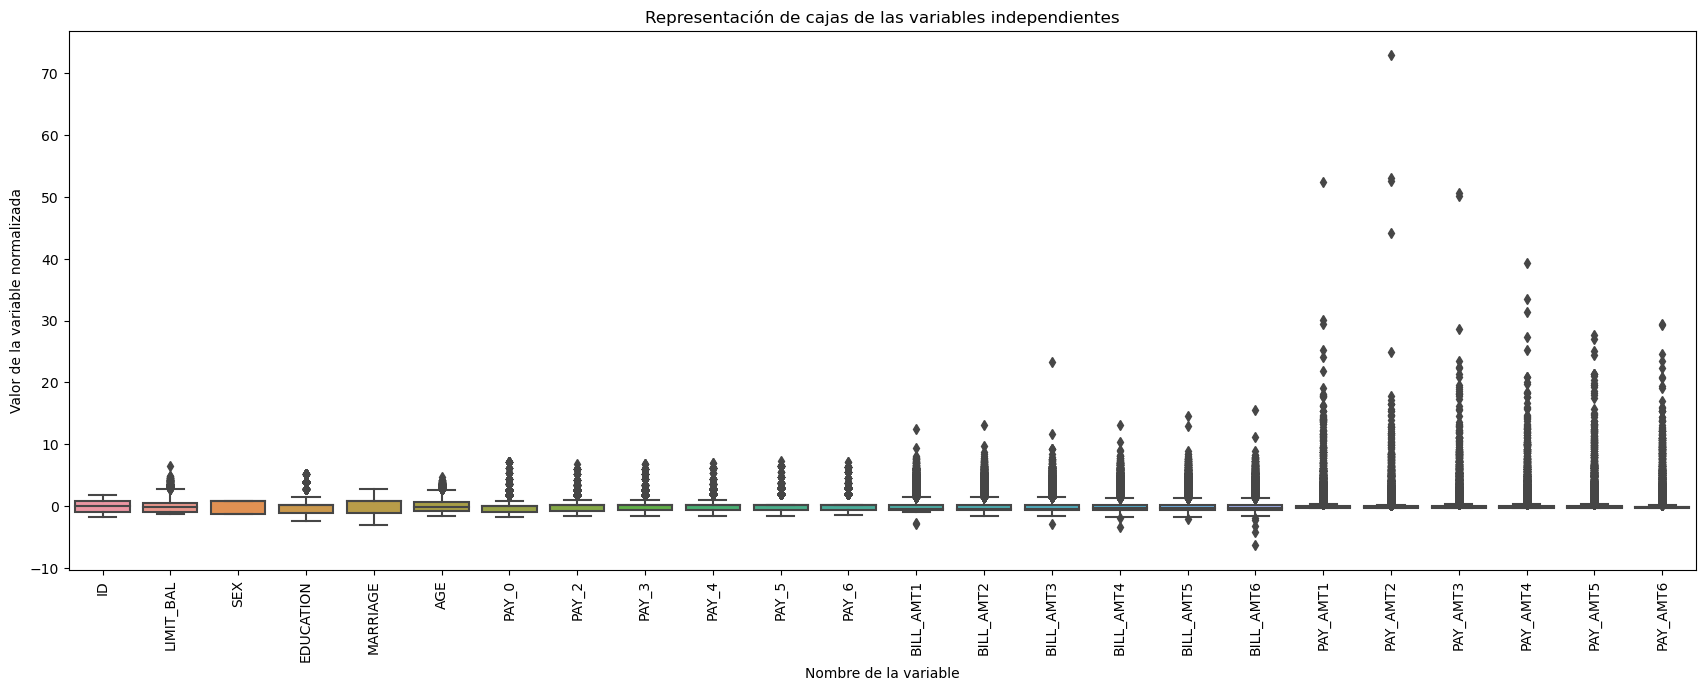

In [27]:
plt.figure(figsize=(21,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
plt.title(u'Representación de cajas de las variables independientes')
plt.ylabel(u'Valor de la variable normalizada')
_ = plt.xlabel(u'Nombre de la variable')

### Histogramas

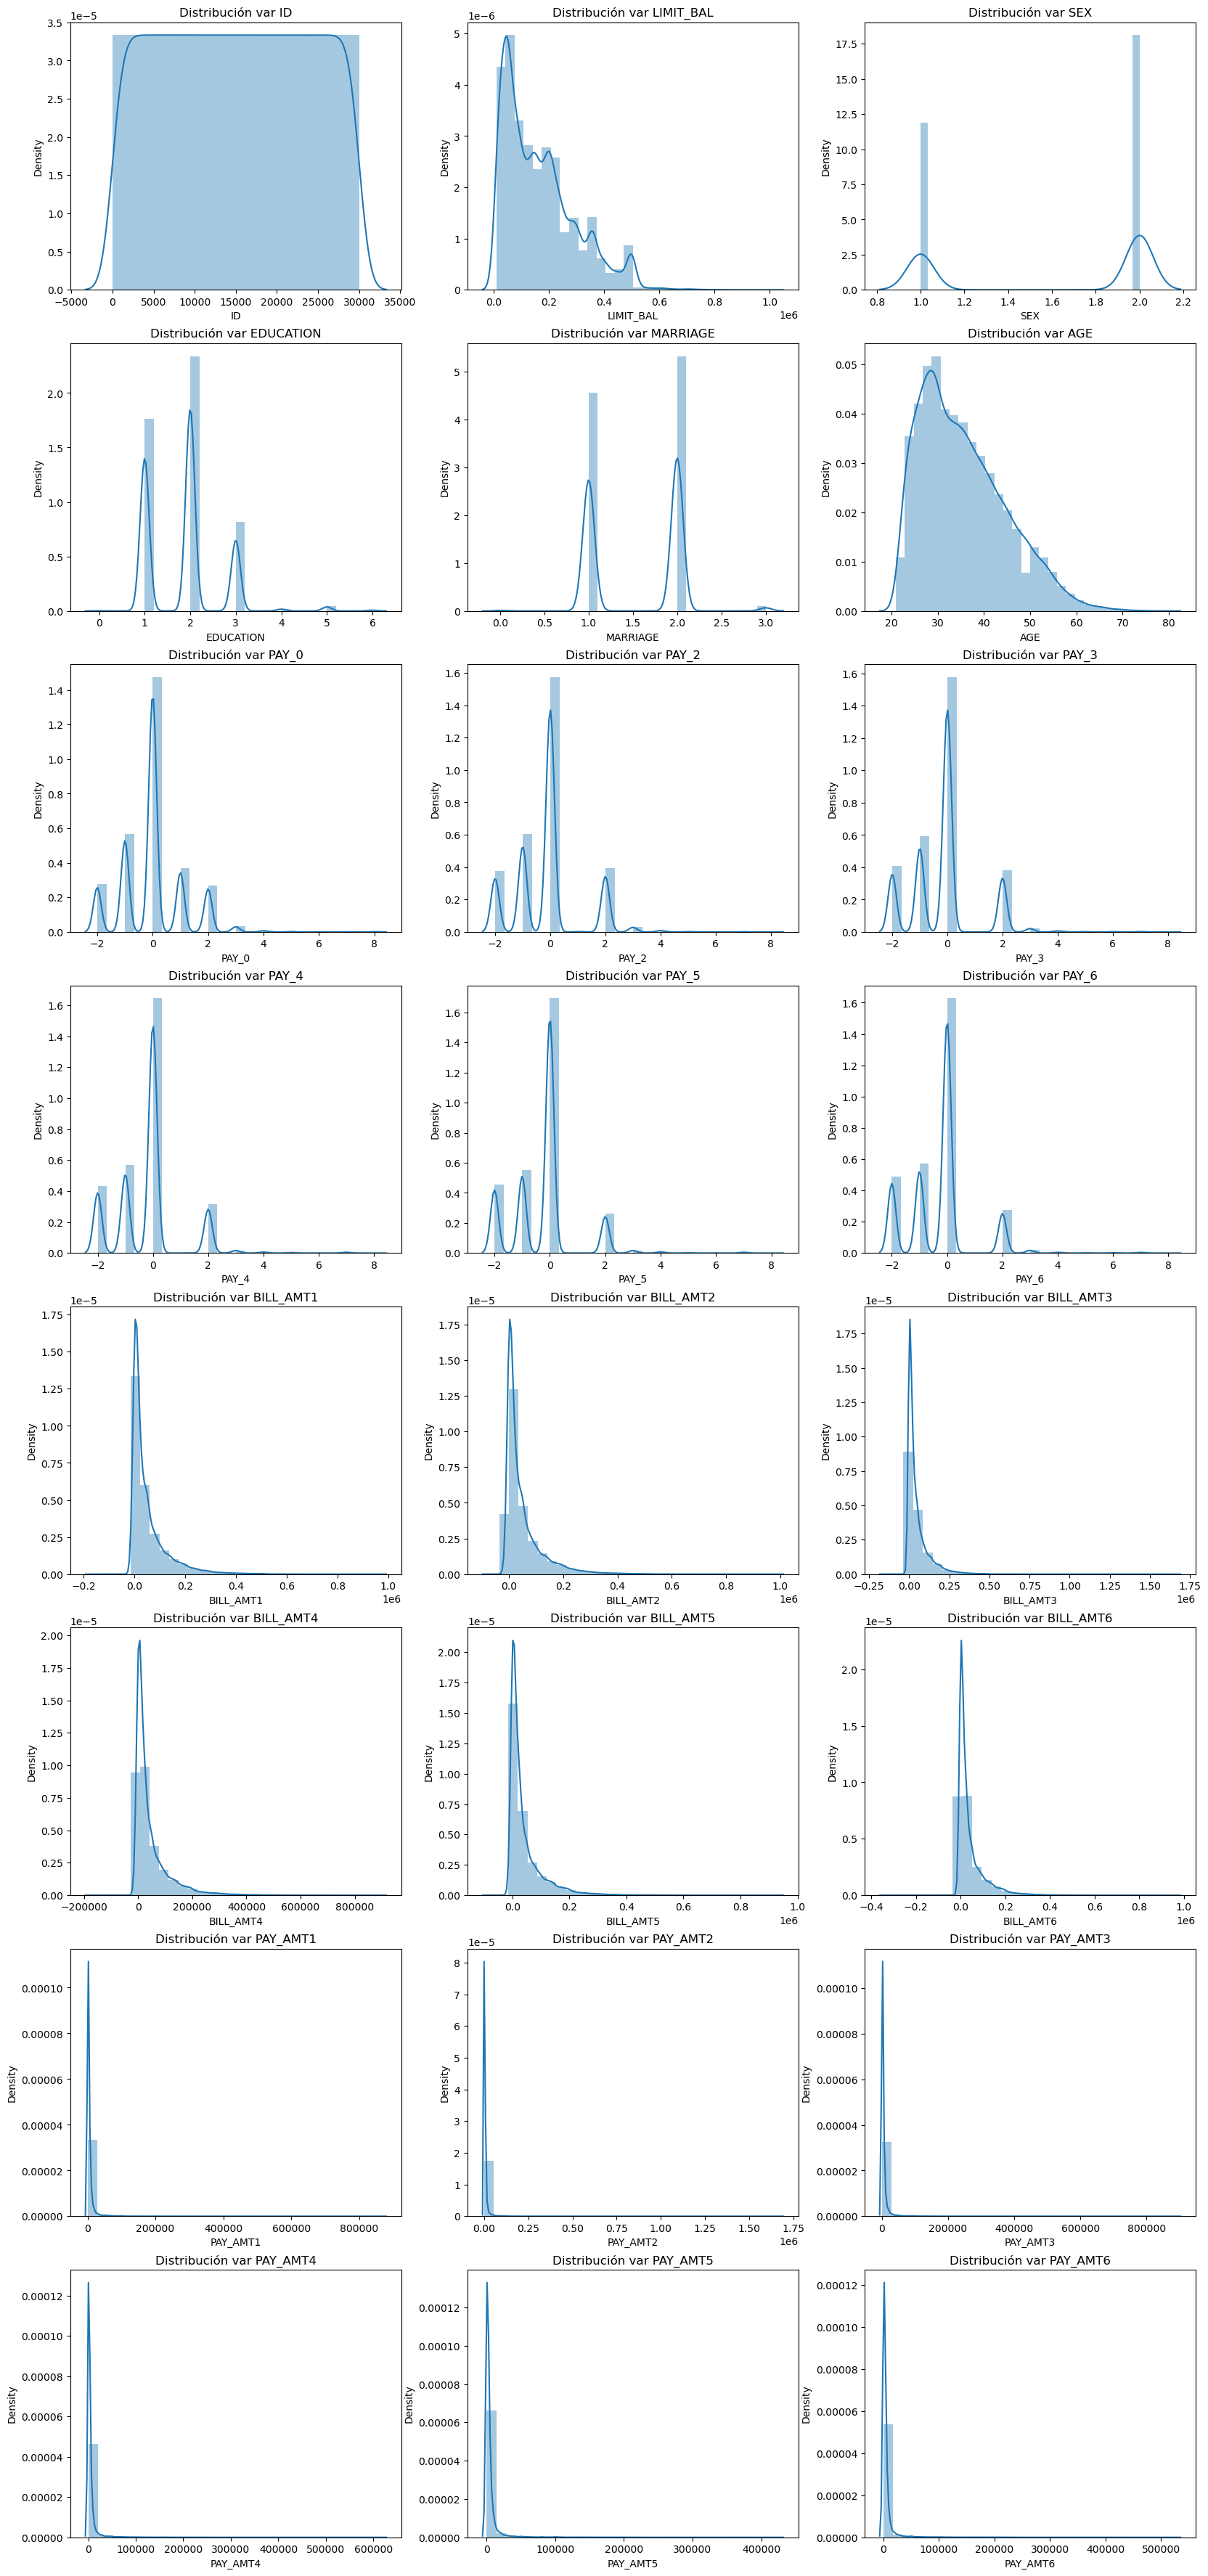

In [34]:
plt.figure(figsize=(20,45))
n = 0
for i, column in enumerate(X.columns):
    n += 1
    plt.subplot(8, 3, n)
    sns.distplot(X[column], bins = 30)
    plt.title('Distribución var {}'.format(column))
plt.show()

### Relación variable vs 'default payment next month'

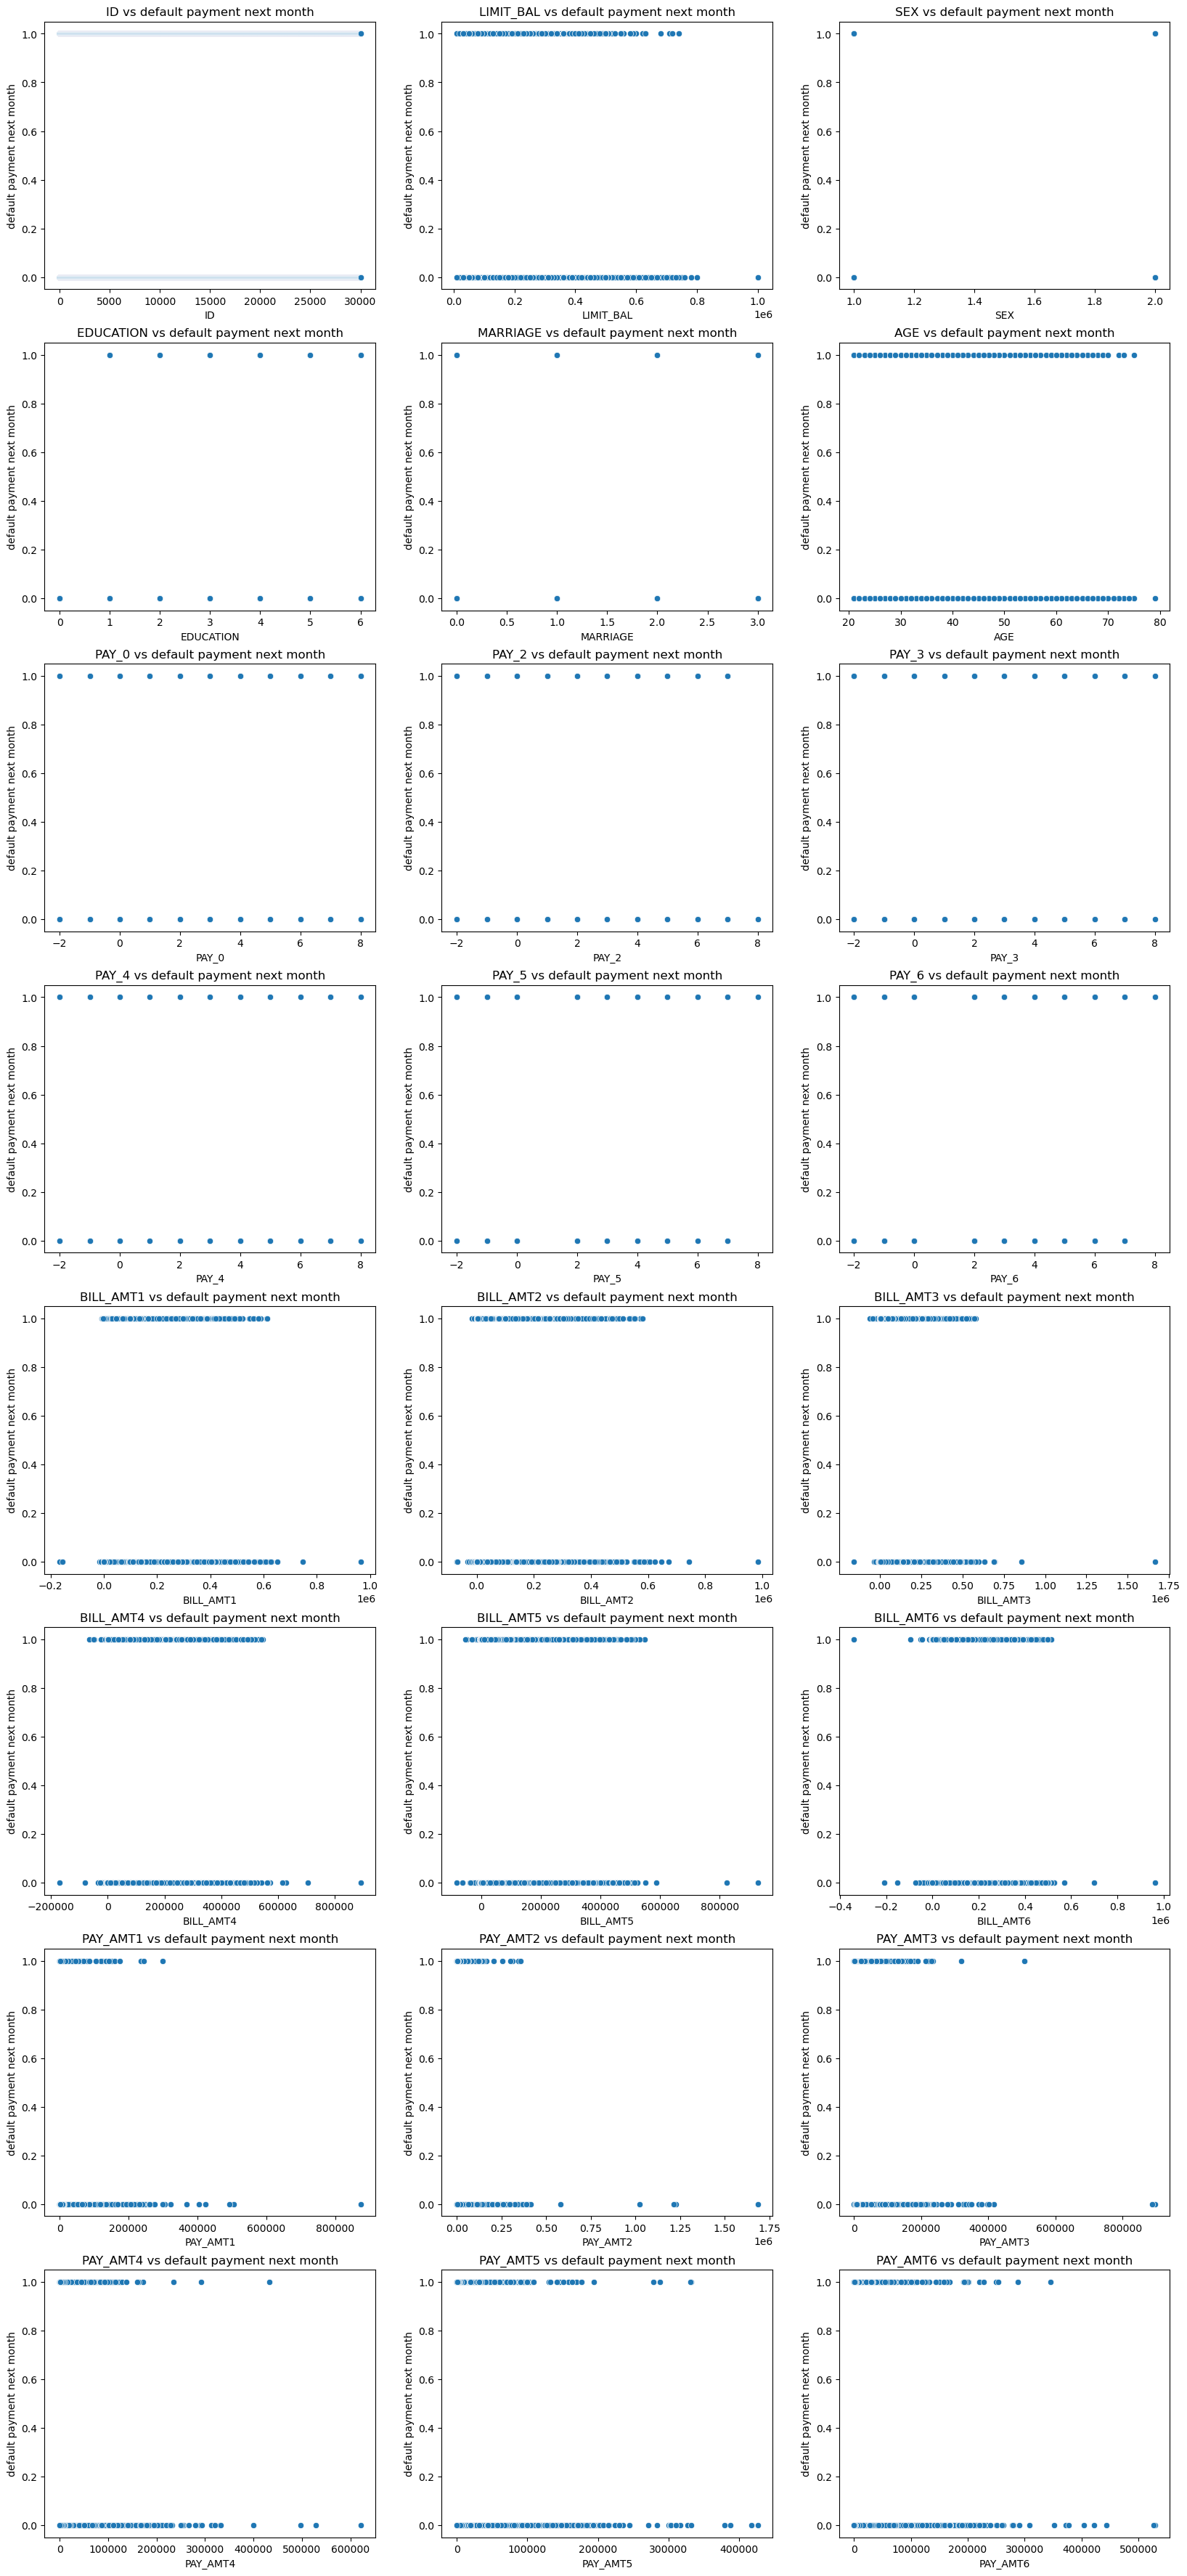

In [36]:
plt.figure(figsize=(20,45))
n = 0
for i, columns in enumerate(X.columns):
    n += 1
    plt.subplot(8, 3, n)
    sns.scatterplot(x = X[columns], y = Y)
    plt.title('%s vs %s' % (columns, 'default payment next month'))
    plt.ylabel('default payment next month')
    plt.xlabel(columns)
plt.show()

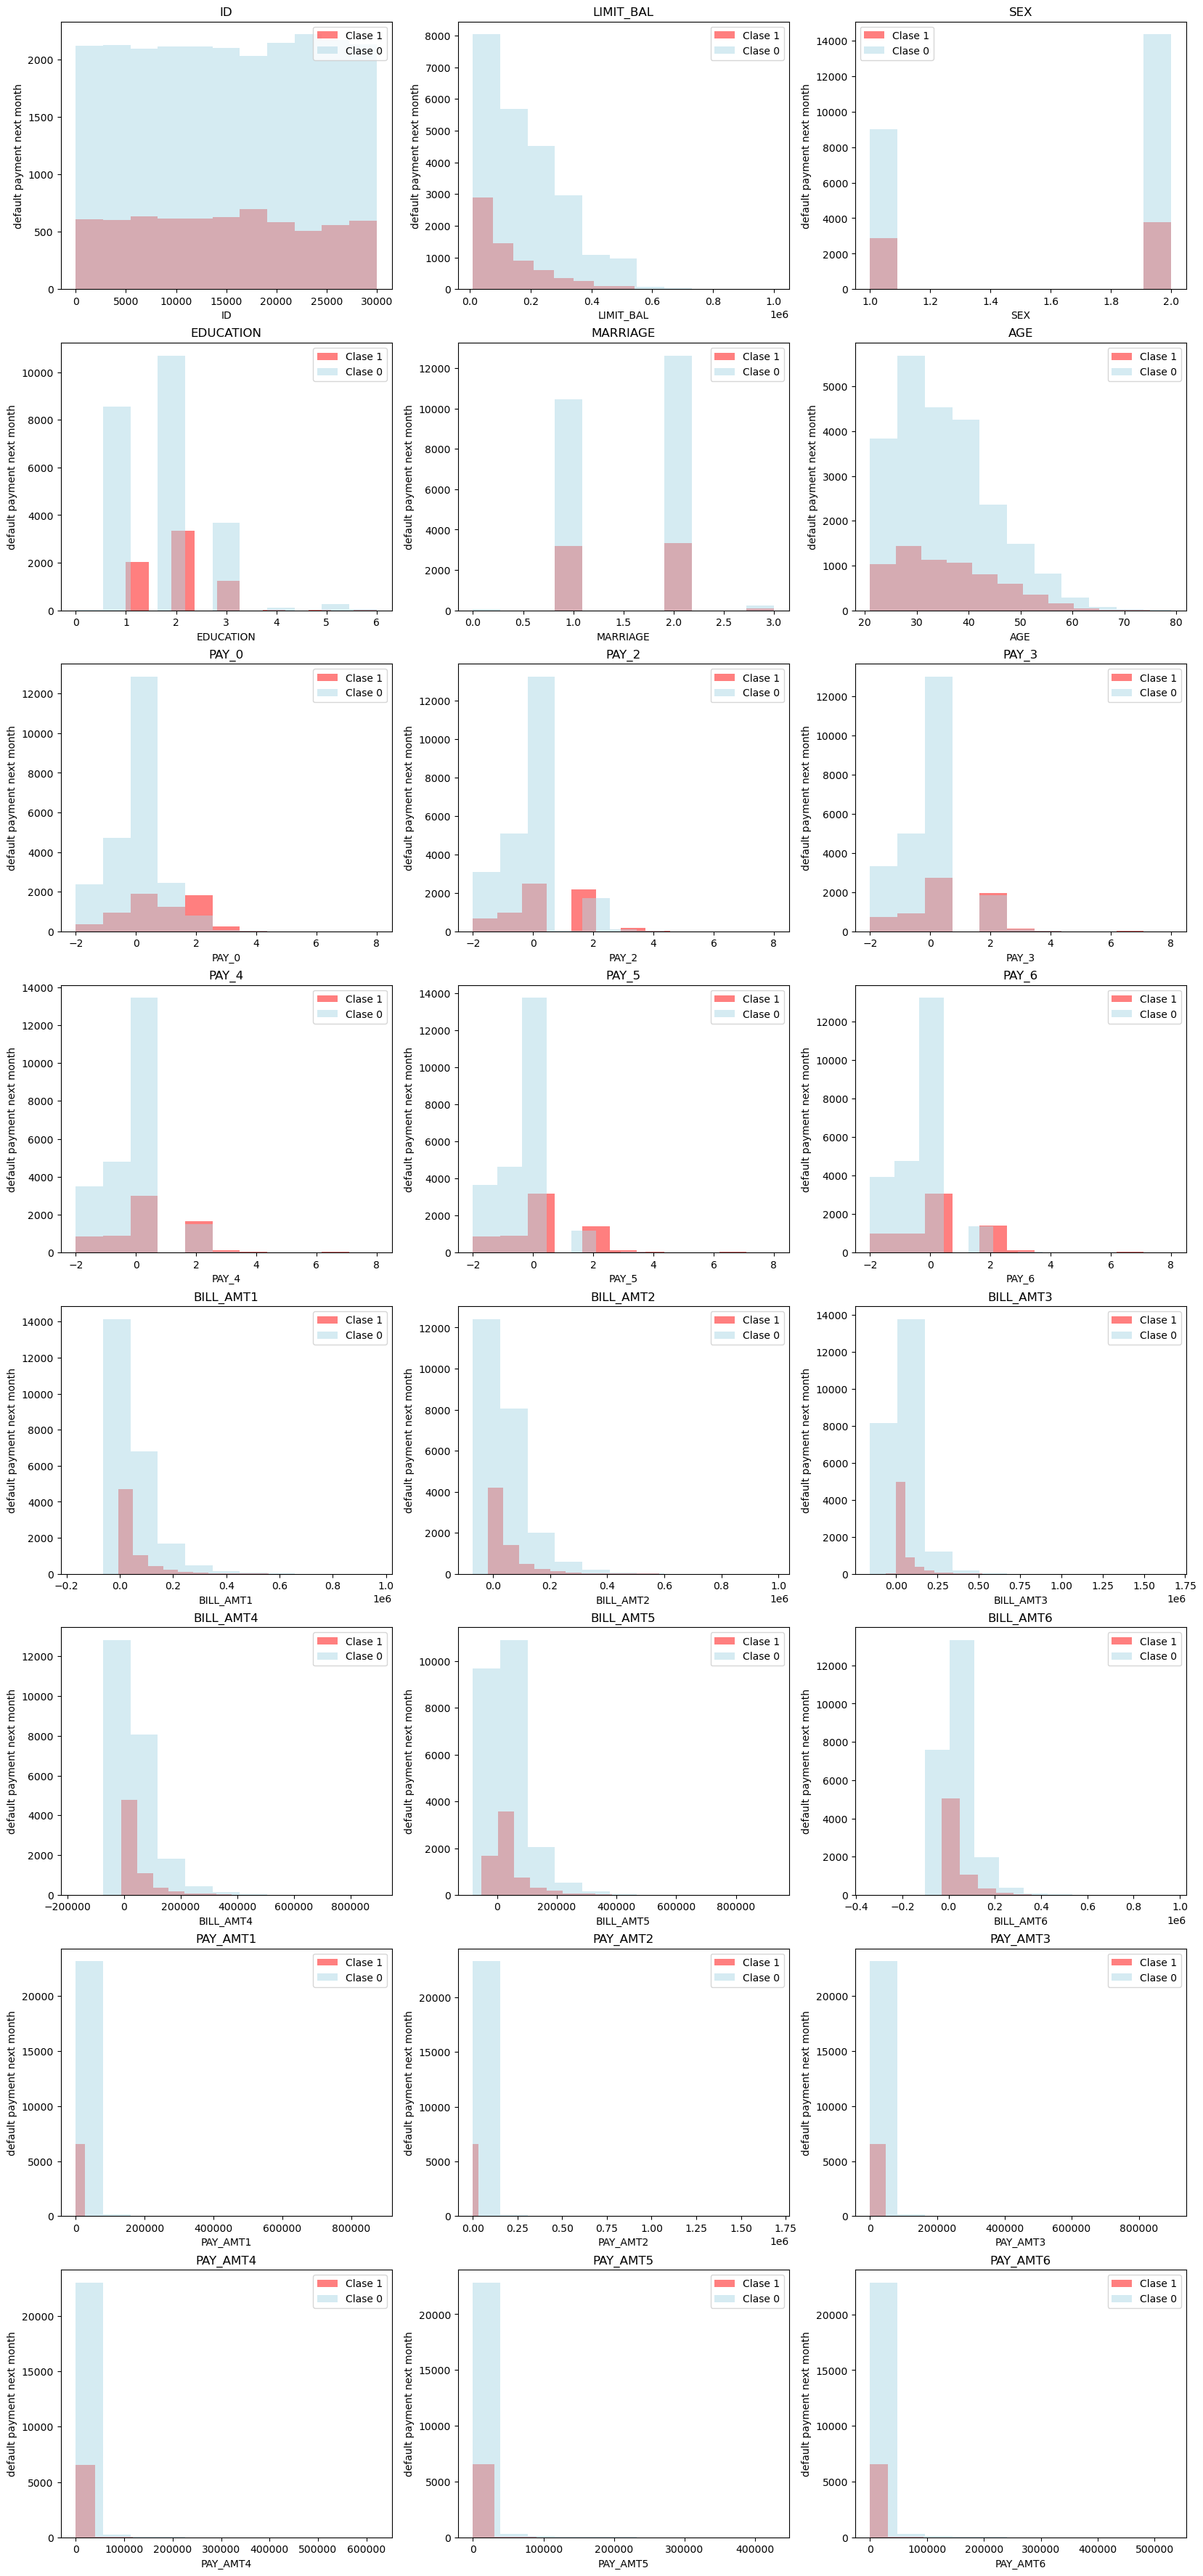

In [37]:
plt.figure(figsize=(20,45))
n = 0
bins = 11
targets=(1, 0)
target_pos, target_neg = targets
for i, columns in enumerate(X.columns):
    n += 1
    plt.subplot(8, 3, n)
    idx_pos = Y == target_pos
    idx_neg = Y == target_neg
    plt.hist(X[columns][idx_pos].values, bins, density = 0, alpha = 0.5, label = 'Clase 1', color = 'red')
    plt.hist(X[columns][idx_neg].values, bins, density = 0, alpha = 0.5, label = 'Clase 0', color = 'lightblue')
    plt.title('%s' % columns)
    plt.legend(loc = 'best')
    plt.ylabel('default payment next month')
    plt.xlabel(columns)
plt.show()

### Matriz de correlaciones

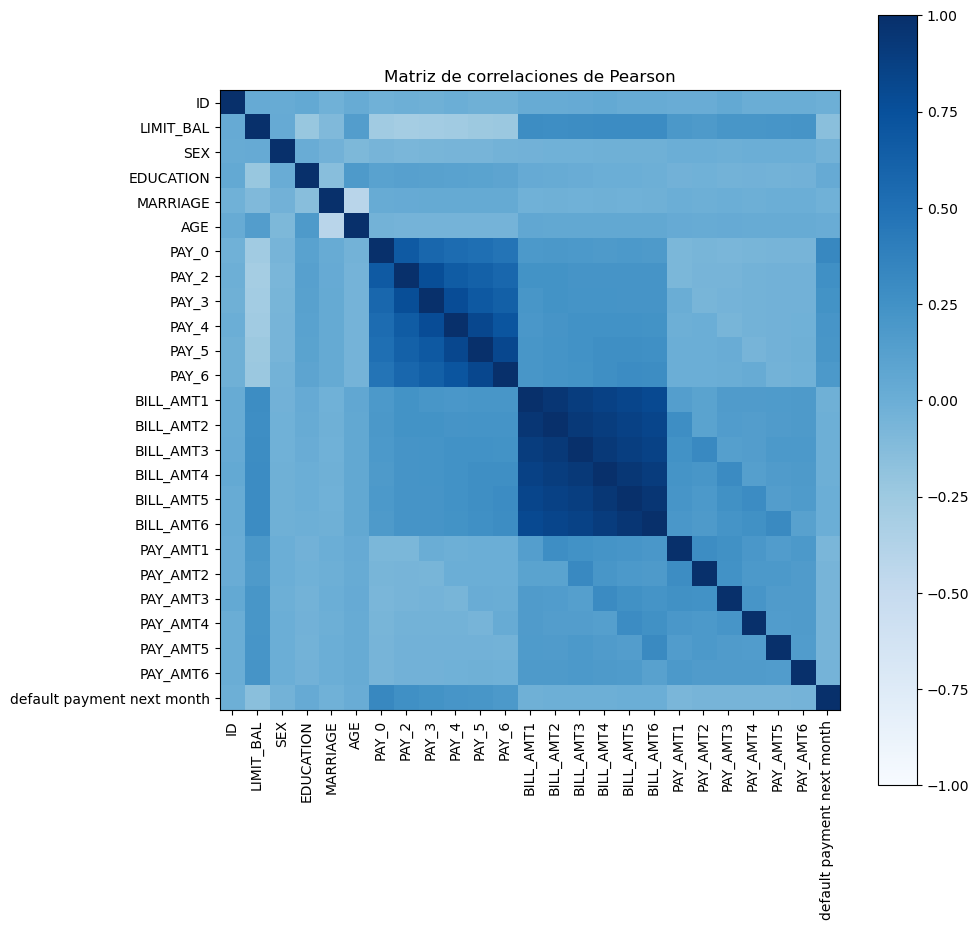

In [38]:
matriz_correlaciones = data.corr(method='pearson')
n_ticks = len(data.columns)
plt.figure(figsize=(10, 10))
plt.xticks(range(n_ticks), data.columns, rotation = 'vertical')
plt.yticks(range(n_ticks), data.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', vmin=-1., vmax=1., cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')
plt.show()

### Variables con mayor correlación con la target

In [39]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
PAY_0,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
LIMIT_BAL,-0.153520
PAY_AMT1,-0.072929
PAY_AMT2,-0.058579
PAY_AMT4,-0.056827


### Estandarización previa de los datos

In [40]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

### División en train y test

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Modelaje

### Aplicación de un modelo de redes neuronales

In [42]:
modelo = MLPClassifier()
parametros = {'solver': ['lbfgs'], 
              'max_iter': [100,200,300,500], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(1, 10), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Número de neuronas en cada capa
              'random_state':[0]}

In [43]:
modelo_GS = GridSearchCV(modelo, param_grid = parametros, cv = 3, scoring = 'roc_auc', n_jobs=-1, verbose=10)
modelo_GS.fit(X_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV 1/3; 1/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 2/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 1/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 3/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 1/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 2/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 3/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 2/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 1/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.3s
[CV 3/3; 3/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 1/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.772 total time=   1.3s
[CV 2/3; 1/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.762 total time=   1.3s
[CV 1/3; 4/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 4/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 2/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.754 total time=   2.5s
[CV 3/3; 2/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.766 total time=   2.5s
[CV 3/3; 4/180] START alpha=0.1, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 5/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 2/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.763 total time=   2.6s
[CV 2/3; 5/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 3/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.749 total time=   3.7s
[CV 3/3; 5/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 5/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.763 total time=   1.3s
[CV 1/3; 6/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 3/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.757 total time=   3.8s
[CV 2/3; 6/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 5/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.754 total time=   1.3s
[CV 3/3; 6/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 3/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.763 total time=   3.6s
[CV 1/3; 7/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 5/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.769 total time=   1.3s
[CV 2/3; 7/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 6/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.753 total time=   2.4s
[CV 3/3; 7/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 6/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.6s
[CV 1/3; 8/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 6/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.7s
[CV 2/3; 8/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 4/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.747 total time=   5.8s
[CV 3/3; 8/180] START alpha=0.1, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 4/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.757 total time=   5.9s
[CV 1/3; 9/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 4/180] END alpha=0.1, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.758 total time=   5.8s
[CV 2/3; 9/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 7/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.749 total time=   3.9s
[CV 1/3; 9/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.3s
[CV 1/3; 10/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 9/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 7/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   3.9s
[CV 2/3; 10/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 9/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.2s
[CV 3/3; 10/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 9/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.763 total time=   1.2s
[CV 1/3; 11/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 7/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.752 total time=   3.8s
[CV 2/3; 11/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 10/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.762 total time=   2.3s
[CV 3/3; 11/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 10/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.745 total time=   2.2s
[CV 1/3; 12/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 10/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.755 total time=   2.4s
[CV 2/3; 12/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 8/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.743 total time=   5.9s
[CV 3/3; 12/180] START alpha=0.1, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 8/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.742 total time=   5.8s
[CV 1/3; 13/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 8/180] END alpha=0.1, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.752 total time=   5.6s
[CV 2/3; 13/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 11/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.758 total time=   3.3s
[CV 3/3; 13/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 11/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.745 total time=   3.4s
[CV 1/3; 14/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 13/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.1s
[CV 2/3; 14/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 13/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.752 total time=   1.2s
[CV 3/3; 14/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 13/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.1s
[CV 1/3; 15/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 11/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.752 total time=   3.3s
[CV 2/3; 15/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 14/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.1s
[CV 3/3; 15/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 14/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.2s
[CV 1/3; 16/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 14/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.1s
[CV 2/3; 16/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 12/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   5.7s
[CV 3/3; 16/180] START alpha=0.1, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 2/3; 12/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.741 total time=   5.6s
[CV 1/3; 17/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 15/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.751 total time=   3.3s
[CV 2/3; 17/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 15/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.748 total time=   3.4s
[CV 3/3; 17/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 12/180] END alpha=0.1, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.6s
[CV 1/3; 18/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 17/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.760 total time=   1.1s
[CV 2/3; 18/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 17/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.750 total time=   1.2s
[CV 3/3; 18/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 17/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.1s
[CV 1/3; 19/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 15/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.754 total time=   3.3s
[CV 2/3; 19/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 18/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.754 total time=   2.2s
[CV 3/3; 19/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 18/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.739 total time=   2.4s
[CV 1/3; 20/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 18/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.761 total time=   2.3s
[CV 2/3; 20/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 16/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.747 total time=   5.5s
[CV 3/3; 20/180] START alpha=0.1, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 16/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.748 total time=   5.5s
[CV 1/3; 21/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 19/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.751 total time=   3.3s
[CV 2/3; 21/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 2/3; 19/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.737 total time=   3.4s
[CV 3/3; 16/180] END alpha=0.1, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.5s
[CV 3/3; 21/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 22/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 21/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.0s
[CV 2/3; 22/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 21/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.756 total time=   1.0s
[CV 3/3; 22/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 21/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.1s
[CV 1/3; 23/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 19/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.759 total time=   3.5s
[CV 2/3; 23/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 22/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.763 total time=   2.0s
[CV 3/3; 23/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 22/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.747 total time=   2.0s
[CV 1/3; 24/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 22/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.763 total time=   1.9s
[CV 2/3; 24/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 20/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.748 total time=   5.4s
[CV 1/3; 23/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.761 total time=   3.0s
[CV 3/3; 24/180] START alpha=0.01, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 20/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.733 total time=   5.5s
[CV 1/3; 25/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 25/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 23/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.744 total time=   3.0s
[CV 3/3; 25/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 20/180] END alpha=0.1, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.757 total time=   5.6s
[CV 1/3; 26/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 3/3; 23/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.757 total time=   3.1s
[CV 2/3; 26/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 25/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.762 total time=   1.1s
[CV 3/3; 26/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 25/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.753 total time=   1.1s
[CV 1/3; 27/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 25/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.1s
[CV 2/3; 27/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 26/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.756 total time=   2.2s
[CV 3/3; 27/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 24/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.757 total time=   5.3s
[CV 1/3; 28/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 26/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.4s
[CV 2/3; 26/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.744 total time=   2.5s[CV 2/3; 28/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs

[CV 3/3; 28/180] START alpha=0.01, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 24/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.743 total time=   5.2s
[CV 1/3; 29/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 27/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   3.4s
[CV 2/3; 29/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 27/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.741 total time=   3.5s
[CV 3/3; 29/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 29/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.1s
[CV 1/3; 30/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 24/180] END alpha=0.01, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.756 total time=   5.2s
[CV 2/3; 30/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 29/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.756 total time=   1.1s
[CV 3/3; 30/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 29/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.1s
[CV 1/3; 31/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 27/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.752 total time=   3.5s
[CV 2/3; 31/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 30/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.3s
[CV 3/3; 31/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 30/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.751 total time=   2.4s
[CV 1/3; 32/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 30/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.761 total time=   2.1s
[CV 2/3; 32/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 28/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.747 total time=   5.5s
[CV 3/3; 32/180] START alpha=0.01, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 28/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.6s
[CV 1/3; 33/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 28/180] END alpha=0.01, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.740 total time=   5.7s
[CV 2/3; 33/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 31/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.751 total time=   3.5s
[CV 3/3; 33/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 31/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   3.3s
[CV 1/3; 34/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 33/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.2s
[CV 2/3; 34/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 33/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.753 total time=   1.2s
[CV 3/3; 34/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 31/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.759 total time=   3.5s
[CV 1/3; 35/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 33/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.2s
[CV 2/3; 35/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 34/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.2s
[CV 3/3; 35/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 34/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.3s
[CV 1/3; 36/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 34/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.761 total time=   2.3s
[CV 2/3; 36/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 32/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   5.6s
[CV 3/3; 36/180] START alpha=0.01, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 32/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.751 total time=   5.8s
[CV 1/3; 37/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 35/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.745 total time=   3.3s
[CV 2/3; 37/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 35/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.755 total time=   3.4s
[CV 3/3; 37/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 32/180] END alpha=0.01, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.755 total time=   5.8s
[CV 1/3; 38/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 37/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.756 total time=   1.2s
[CV 2/3; 38/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 3/3; 35/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.756 total time=   3.3s
[CV 3/3; 38/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 37/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.744 total time=   1.2s
[CV 1/3; 39/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 37/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.764 total time=   1.2s
[CV 2/3; 39/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 38/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.751 total time=   2.3s
[CV 3/3; 39/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 38/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.738 total time=   2.3s
[CV 1/3; 40/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 38/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.755 total time=   2.4s
[CV 2/3; 40/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 36/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.751 total time=   5.6s
[CV 3/3; 40/180] START alpha=0.01, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 36/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.744 total time=   5.6s
[CV 1/3; 41/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 39/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   3.5s
[CV 2/3; 41/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 39/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.736 total time=   3.6s
[CV 3/3; 41/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 36/180] END alpha=0.01, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.7s
[CV 1/3; 42/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 41/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.0s
[CV 2/3; 42/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 41/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.757 total time=   1.0s
[CV 3/3; 42/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 41/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.770 total time=   1.0s
[CV 1/3; 43/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 39/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   3.4s
[CV 2/3; 43/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 42/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.764 total time=   2.1s
[CV 3/3; 43/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 42/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.1s
[CV 1/3; 44/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 42/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.762 total time=   2.1s
[CV 2/3; 44/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 40/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.745 total time=   5.7s
[CV 3/3; 44/180] START alpha=0.001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 43/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.760 total time=   3.1s
[CV 1/3; 45/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 40/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.732 total time=   5.8s
[CV 2/3; 45/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 43/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.745 total time=   3.2s
[CV 3/3; 45/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 40/180] END alpha=0.01, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.749 total time=   5.6s
[CV 1/3; 46/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 43/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.760 total time=   3.0s
[CV 1/3; 45/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.764 total time=   1.2s
[CV 2/3; 46/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 46/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 45/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.753 total time=   1.1s
[CV 1/3; 47/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 45/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.1s
[CV 2/3; 47/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 46/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.3s
[CV 3/3; 47/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 2/3; 46/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.746 total time=   2.3s
[CV 1/3; 48/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 46/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.4s
[CV 2/3; 48/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 44/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.759 total time=   5.2s
[CV 3/3; 48/180] START alpha=0.001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 44/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.741 total time=   5.1s
[CV 1/3; 49/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 44/180] END alpha=0.001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.755 total time=   5.2s
[CV 2/3; 49/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 47/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.746 total time=   3.4s
[CV 3/3; 49/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 47/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.743 total time=   3.5s
[CV 1/3; 50/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 49/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.1s
[CV 2/3; 50/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 49/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.1s
[CV 3/3; 50/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 49/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.754 total time=   1.2s
[CV 1/3; 51/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 47/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.756 total time=   3.4s
[CV 2/3; 51/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 50/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.1s
[CV 3/3; 51/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 50/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.3s


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 52/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 50/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.4s
[CV 2/3; 52/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 3/3; 48/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.752 total time=   5.5s
[CV 3/3; 52/180] START alpha=0.001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 48/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.742 total time=   5.6s
[CV 1/3; 53/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 48/180] END alpha=0.001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.738 total time=   5.7s
[CV 2/3; 53/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 51/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.754 total time=   3.7s
[CV 3/3; 53/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 51/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.744 total time=   3.5s
[CV 1/3; 54/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 53/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.1s
[CV 2/3; 54/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 53/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.753 total time=   1.2s
[CV 3/3; 54/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 51/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.756 total time=   3.3s
[CV 1/3; 55/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 53/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.2s
[CV 2/3; 55/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 54/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.2s
[CV 3/3; 55/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 54/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.746 total time=   2.3s
[CV 1/3; 56/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 54/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.3s
[CV 2/3; 56/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 52/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.751 total time=   5.8s
[CV 3/3; 56/180] START alpha=0.001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 55/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.756 total time=   3.4s
[CV 1/3; 57/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 52/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.742 total time=   5.8s
[CV 2/3; 57/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 55/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.743 total time=   3.4s


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 57/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 57/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.759 total time=   1.2s
[CV 1/3; 58/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 52/180] END alpha=0.001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.753 total time=   5.9s
[CV 2/3; 58/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 57/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.746 total time=   1.2s
[CV 3/3; 58/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 57/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.2s
[CV 1/3; 59/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 55/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.757 total time=   3.5s
[CV 2/3; 59/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 58/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.752 total time=   2.3s
[CV 3/3; 59/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 58/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.742 total time=   2.3s
[CV 1/3; 60/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 58/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.4s
[CV 2/3; 60/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 56/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.752 total time=   5.7s
[CV 3/3; 60/180] START alpha=0.001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 56/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.741 total time=   5.7s
[CV 1/3; 61/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 59/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   3.6s
[CV 2/3; 61/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 56/180] END alpha=0.001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   5.9s
[CV 3/3; 61/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 59/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.738 total time=   3.7s
[CV 1/3; 62/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 61/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.1s
[CV 2/3; 62/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 61/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.759 total time=   1.1s
[CV 3/3; 62/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 61/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.769 total time=   1.1s
[CV 1/3; 63/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 59/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   3.6s
[CV 2/3; 63/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 62/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.762 total time=   2.1s
[CV 3/3; 63/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 62/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.751 total time=   2.0s
[CV 1/3; 64/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 62/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.762 total time=   2.1s
[CV 2/3; 64/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 60/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.747 total time=   5.7s
[CV 3/3; 64/180] START alpha=0.0001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 63/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.761 total time=   3.1s
[CV 1/3; 65/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 60/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.736 total time=   5.8s
[CV 2/3; 65/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 63/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.748 total time=   3.1s
[CV 3/3; 65/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 60/180] END alpha=0.001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   6.0s
[CV 1/3; 66/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 65/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.764 total time=   1.3s
[CV 2/3; 66/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 65/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.3s
[CV 3/3; 66/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 63/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.759 total time=   3.3s
[CV 1/3; 67/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 65/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.4s
[CV 2/3; 67/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 66/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.755 total time=   2.7s
[CV 3/3; 67/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 64/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.755 total time=   5.5s
[CV 1/3; 68/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 66/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.751 total time=   2.7s
[CV 2/3; 68/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 66/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.761 total time=   2.8s
[CV 3/3; 68/180] START alpha=0.0001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 64/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.745 total time=   5.7s
[CV 1/3; 69/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 67/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   3.7s
[CV 2/3; 69/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 64/180] END alpha=0.0001, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.757 total time=   5.7s
[CV 3/3; 69/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 69/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.3s
[CV 1/3; 70/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 67/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   3.8s
[CV 2/3; 70/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 69/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.2s
[CV 3/3; 70/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 69/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.1s
[CV 1/3; 71/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 67/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.756 total time=   3.7s
[CV 2/3; 71/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 70/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.3s
[CV 3/3; 71/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 70/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.5s
[CV 1/3; 72/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 70/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.3s
[CV 2/3; 72/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 68/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   5.7s
[CV 3/3; 72/180] START alpha=0.0001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 68/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.743 total time=   5.7s
[CV 1/3; 73/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 68/180] END alpha=0.0001, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.755 total time=   5.7s
[CV 2/3; 73/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 71/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   3.4s
[CV 3/3; 73/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 73/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.1s
[CV 1/3; 74/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 71/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.746 total time=   3.4s
[CV 2/3; 74/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 73/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.753 total time=   1.1s
[CV 3/3; 74/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 73/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.764 total time=   1.1s
[CV 1/3; 75/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 71/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.754 total time=   3.6s
[CV 2/3; 75/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 74/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.1s
[CV 3/3; 75/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 74/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.3s
[CV 1/3; 76/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 74/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.2s
[CV 2/3; 76/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 72/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.751 total time=   5.7s
[CV 3/3; 76/180] START alpha=0.0001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 72/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.743 total time=   5.6s
[CV 1/3; 77/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 75/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.756 total time=   3.2s
[CV 2/3; 77/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 72/180] END alpha=0.0001, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.7s
[CV 3/3; 77/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 2/3; 75/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.746 total time=   3.5s
[CV 1/3; 78/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 77/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.758 total time=   1.2s
[CV 2/3; 78/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 77/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.748 total time=   1.3s
[CV 3/3; 78/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 77/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.1s
[CV 3/3; 75/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.758 total time=   3.4s
[CV 1/3; 79/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 79/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 78/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.751 total time=   2.3s
[CV 3/3; 79/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 78/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.742 total time=   2.4s
[CV 1/3; 80/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 78/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.4s
[CV 2/3; 80/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 76/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.8s
[CV 3/3; 80/180] START alpha=0.0001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 76/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.742 total time=   6.1s
[CV 1/3; 81/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 79/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.749 total time=   3.5s
[CV 2/3; 81/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 79/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.736 total time=   3.5s
[CV 3/3; 81/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 76/180] END alpha=0.0001, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   5.8s
[CV 1/3; 82/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 81/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.0s
[CV 2/3; 82/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 81/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.758 total time=   1.0s
[CV 3/3; 82/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 81/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.0s
[CV 1/3; 83/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 79/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.752 total time=   3.5s
[CV 2/3; 83/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 82/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.763 total time=   2.0s
[CV 3/3; 83/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 82/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.1s
[CV 1/3; 84/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 82/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.765 total time=   2.1s
[CV 2/3; 84/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 80/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.747 total time=   5.7s
[CV 3/3; 84/180] START alpha=1e-05, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 80/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.736 total time=   5.6s
[CV 1/3; 85/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 83/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.758 total time=   3.0s
[CV 2/3; 85/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 83/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.749 total time=   3.0s
[CV 3/3; 85/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 80/180] END alpha=0.0001, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.752 total time=   5.7s
[CV 1/3; 86/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 85/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.1s
[CV 2/3; 86/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 85/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.1s
[CV 3/3; 83/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.763 total time=   3.0s
[CV 3/3; 86/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 87/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 85/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.1s
[CV 2/3; 87/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 86/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.754 total time=   2.1s
[CV 3/3; 87/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 86/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.1s
[CV 1/3; 88/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 86/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.2s
[CV 2/3; 88/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 84/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.757 total time=   4.9s
[CV 3/3; 88/180] START alpha=1e-05, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 84/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.747 total time=   5.1s
[CV 1/3; 89/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 87/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.748 total time=   3.3s
[CV 2/3; 89/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 84/180] END alpha=1e-05, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.760 total time=   5.1s
[CV 3/3; 89/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 87/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.746 total time=   3.5s
[CV 1/3; 90/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 89/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.4s
[CV 2/3; 90/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 89/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.754 total time=   1.2s
[CV 3/3; 90/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 89/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.2s
[CV 1/3; 91/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 87/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   3.6s
[CV 2/3; 91/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 90/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.5s
[CV 3/3; 91/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 90/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.3s
[CV 1/3; 92/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 90/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.3s
[CV 2/3; 92/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 88/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.747 total time=   5.8s
[CV 3/3; 92/180] START alpha=1e-05, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 88/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.740 total time=   6.3s
[CV 1/3; 93/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 91/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.756 total time=   3.6s
[CV 3/3; 88/180] END alpha=1e-05, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.753 total time=   6.3s
[CV 2/3; 93/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 93/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 91/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   3.7s
[CV 1/3; 94/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 93/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.2s
[CV 2/3; 94/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 93/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.2s
[CV 3/3; 94/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 93/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.751 total time=   1.2s
[CV 1/3; 95/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 91/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.759 total time=   4.0s
[CV 2/3; 95/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 94/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.3s
[CV 3/3; 95/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 94/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.747 total time=   2.3s
[CV 1/3; 96/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 94/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.3s
[CV 2/3; 96/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 92/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.745 total time=   6.0s
[CV 1/3; 92/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.753 total time=   6.2s
[CV 3/3; 96/180] START alpha=1e-05, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 97/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 95/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   3.5s
[CV 2/3; 97/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 3/3; 92/180] END alpha=1e-05, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   6.1s
[CV 3/3; 97/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 95/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.745 total time=   3.5s
[CV 1/3; 98/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 97/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.758 total time=   1.2s
[CV 2/3; 98/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 97/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.748 total time=   1.2s
[CV 3/3; 98/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 95/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.758 total time=   3.4s
[CV 1/3; 99/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 97/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.2s
[CV 2/3; 99/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 98/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.744 total time=   2.4s
[CV 3/3; 99/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 98/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.754 total time=   2.6s
[CV 1/3; 100/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 98/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.5s
[CV 2/3; 100/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 96/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   6.0s
[CV 3/3; 100/180] START alpha=1e-05, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 96/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.743 total time=   5.9s
[CV 1/3; 101/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 99/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   3.6s
[CV 2/3; 101/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 96/180] END alpha=1e-05, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   5.9s
[CV 3/3; 101/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 99/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.740 total time=   3.7s
[CV 1/3; 102/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 101/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.0s
[CV 2/3; 102/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 101/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.758 total time=   1.0s
[CV 3/3; 102/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 101/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.771 total time=   1.0s
[CV 1/3; 103/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 99/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   3.6s
[CV 2/3; 103/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 102/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.1s
[CV 3/3; 103/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 102/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.752 total time=   2.0s
[CV 1/3; 104/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 102/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.764 total time=   2.0s
[CV 2/3; 104/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 100/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.747 total time=   5.7s
[CV 3/3; 104/180] START alpha=1e-06, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 100/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.737 total time=   5.6s
[CV 1/3; 105/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 103/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.757 total time=   3.2s
[CV 2/3; 105/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 103/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.749 total time=   3.1s
[CV 3/3; 105/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 105/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.0s
[CV 1/3; 106/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 100/180] END alpha=1e-05, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.8s
[CV 2/3; 106/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 105/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.1s
[CV 3/3; 106/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 103/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.762 total time=   3.1s
[CV 1/3; 107/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 105/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.1s
[CV 2/3; 107/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 106/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.754 total time=   2.1s
[CV 2/3; 106/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.751 total time=   2.1s
[CV 3/3; 107/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 108/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 106/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.1s
[CV 2/3; 108/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 104/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   5.0s
[CV 3/3; 108/180] START alpha=1e-06, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 104/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.748 total time=   5.0s
[CV 1/3; 109/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 2/3; 107/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.746 total time=   3.2s
[CV 2/3; 109/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 107/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   3.4s
[CV 3/3; 109/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 104/180] END alpha=1e-06, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.759 total time=   5.2s
[CV 1/3; 110/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 109/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.2s
[CV 2/3; 110/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 109/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.0s
[CV 3/3; 110/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 109/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.1s
[CV 1/3; 111/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 107/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.754 total time=   3.4s
[CV 2/3; 111/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 110/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.5s
[CV 3/3; 111/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 110/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.6s
[CV 1/3; 112/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 110/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.9s
[CV 2/3; 112/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 108/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.749 total time=   6.0s
[CV 3/3; 112/180] START alpha=1e-06, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 108/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.744 total time=   6.1s
[CV 1/3; 113/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 108/180] END alpha=1e-06, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.753 total time=   6.1s
[CV 2/3; 113/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 111/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.752 total time=   4.0s
[CV 3/3; 113/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 111/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   3.8s
[CV 1/3; 114/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 113/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.753 total time=   1.2s
[CV 2/3; 114/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 113/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.3s
[CV 3/3; 114/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 113/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.763 total time=   1.2s
[CV 1/3; 115/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 111/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.754 total time=   4.0s
[CV 2/3; 115/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 114/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.755 total time=   2.5s
[CV 3/3; 115/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 114/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.748 total time=   2.7s
[CV 1/3; 116/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 114/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.7s
[CV 2/3; 116/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 112/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.749 total time=   6.4s
[CV 3/3; 116/180] START alpha=1e-06, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 112/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.744 total time=   6.7s
[CV 1/3; 117/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 115/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   4.4s
[CV 2/3; 117/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 115/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.746 total time=   4.3s
[CV 3/3; 117/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 117/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.758 total time=   1.4s
[CV 1/3; 118/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 117/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.747 total time=   1.4s
[CV 2/3; 118/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 112/180] END alpha=1e-06, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   7.5s
[CV 3/3; 118/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 117/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.4s
[CV 1/3; 119/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 115/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.755 total time=   4.4s
[CV 2/3; 119/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 118/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.752 total time=   2.6s
[CV 3/3; 119/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 118/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.744 total time=   2.6s
[CV 3/3; 118/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.6s
[CV 1/3; 120/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 120/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 116/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   6.8s
[CV 3/3; 120/180] START alpha=1e-06, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 116/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   6.9s
[CV 1/3; 121/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 116/180] END alpha=1e-06, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.755 total time=   6.5s
[CV 2/3; 121/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 119/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.749 total time=   3.7s
[CV 3/3; 121/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 119/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.739 total time=   3.7s
[CV 1/3; 122/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 121/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.0s
[CV 2/3; 122/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 121/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.757 total time=   1.0s
[CV 3/3; 122/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 121/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.770 total time=   1.0s
[CV 1/3; 123/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 119/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   3.6s
[CV 2/3; 123/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 122/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.765 total time=   2.1s
[CV 3/3; 123/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 122/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.2s
[CV 1/3; 124/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 122/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.765 total time=   2.2s
[CV 2/3; 124/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 123/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.759 total time=   3.2s
[CV 3/3; 124/180] START alpha=1e-07, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 120/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.737 total time=   6.1s
[CV 1/3; 125/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 120/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.748 total time=   6.2s
[CV 2/3; 125/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 123/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.748 total time=   3.2s
[CV 3/3; 120/180] END alpha=1e-06, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.9s
[CV 3/3; 125/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 126/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 125/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.1s
[CV 3/3; 123/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.761 total time=   3.3s
[CV 2/3; 126/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 126/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 125/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.753 total time=   1.1s
[CV 1/3; 127/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 125/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.769 total time=   1.3s
[CV 2/3; 127/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 126/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.751 total time=   2.8s
[CV 3/3; 127/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 2/3; 126/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.9s
[CV 1/3; 128/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 124/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.757 total time=   5.9s
[CV 2/3; 128/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 126/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   3.0s
[CV 3/3; 128/180] START alpha=1e-07, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 124/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   6.0s
[CV 1/3; 129/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 129/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.4s
[CV 3/3; 124/180] END alpha=1e-07, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.757 total time=   6.2s
[CV 2/3; 129/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 129/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 127/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.748 total time=   4.5s
[CV 1/3; 130/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 127/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   4.4s
[CV 2/3; 130/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 129/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.3s
[CV 3/3; 130/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 129/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.5s
[CV 1/3; 131/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 127/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   4.3s
[CV 2/3; 131/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 130/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.8s
[CV 3/3; 131/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 130/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.8s
[CV 1/3; 132/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 130/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.7s
[CV 2/3; 132/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 128/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.744 total time=   6.7s
[CV 3/3; 132/180] START alpha=1e-07, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 128/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.748 total time=   6.9s
[CV 1/3; 133/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 128/180] END alpha=1e-07, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   7.1s
[CV 2/3; 133/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 131/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   4.3s
[CV 3/3; 133/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 131/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.748 total time=   4.2s
[CV 1/3; 134/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 133/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.5s
[CV 2/3; 134/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 133/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.751 total time=   1.5s
[CV 3/3; 134/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 131/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.759 total time=   4.1s
[CV 1/3; 135/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 133/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.763 total time=   1.3s
[CV 2/3; 135/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 134/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.756 total time=   2.9s
[CV 3/3; 135/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 134/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.748 total time=   2.8s
[CV 1/3; 136/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 134/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.8s
[CV 2/3; 136/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 132/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   6.6s
[CV 3/3; 136/180] START alpha=1e-07, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 135/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.749 total time=   3.9s
[CV 1/3; 137/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 132/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.743 total time=   6.9s
[CV 2/3; 137/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 135/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.744 total time=   3.9s
[CV 3/3; 137/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 137/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.758 total time=   1.1s
[CV 1/3; 138/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 137/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.748 total time=   1.2s
[CV 2/3; 138/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 132/180] END alpha=1e-07, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   7.1s
[CV 3/3; 138/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 137/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.2s
[CV 1/3; 139/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 135/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.757 total time=   3.5s
[CV 2/3; 139/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 138/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.4s
[CV 3/3; 139/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 138/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.755 total time=   2.4s
[CV 1/3; 140/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 138/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.743 total time=   2.5s
[CV 2/3; 140/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 136/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.744 total time=   5.9s
[CV 3/3; 140/180] START alpha=1e-07, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 136/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.743 total time=   5.8s
[CV 1/3; 141/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 139/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.745 total time=   3.8s
[CV 2/3; 141/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 136/180] END alpha=1e-07, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   6.0s
[CV 3/3; 141/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 139/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.738 total time=   3.8s
[CV 1/3; 142/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 141/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.1s
[CV 2/3; 142/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 141/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.757 total time=   1.0s
[CV 3/3; 142/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 141/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.770 total time=   1.1s
[CV 1/3; 143/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 139/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.751 total time=   3.9s
[CV 2/3; 143/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 142/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.762 total time=   2.5s
[CV 3/3; 143/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs
[CV 2/3; 142/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.747 total time=   2.5s
[CV 1/3; 144/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 142/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.765 total time=   2.5s
[CV 2/3; 144/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 143/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.758 total time=   3.7s
[CV 3/3; 144/180] START alpha=1e-08, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 140/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.741 total time=   6.7s
[CV 1/3; 145/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 140/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.735 total time=   6.8s
[CV 2/3; 145/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 143/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.748 total time=   3.6s
[CV 3/3; 145/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 140/180] END alpha=1e-07, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   6.6s
[CV 1/3; 146/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 1/3; 145/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.2s
[CV 2/3; 146/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 143/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.762 total time=   3.6s
[CV 2/3; 145/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.2s
[CV 3/3; 146/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 147/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 145/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.2s
[CV 2/3; 147/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 146/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.753 total time=   2.3s
[CV 3/3; 147/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 144/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.755 total time=   5.7s
[CV 1/3; 148/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 146/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.4s
[CV 2/3; 148/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 146/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.759 total time=   2.4s
[CV 3/3; 148/180] START alpha=1e-08, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 144/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   5.7s
[CV 1/3; 149/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 147/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.749 total time=   3.5s
[CV 2/3; 149/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 149/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.2s
[CV 3/3; 149/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 144/180] END alpha=1e-08, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.759 total time=   5.6s
[CV 1/3; 150/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 147/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.744 total time=   3.6s
[CV 2/3; 150/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 149/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.2s
[CV 3/3; 150/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 149/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.2s
[CV 1/3; 151/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 147/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.755 total time=   3.7s
[CV 2/3; 151/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 150/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.748 total time=   2.3s
[CV 3/3; 151/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 150/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.7s
[CV 1/3; 152/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 150/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.761 total time=   2.4s
[CV 2/3; 152/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 148/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   5.9s
[CV 3/3; 152/180] START alpha=1e-08, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 148/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.742 total time=   5.9s
[CV 1/3; 153/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 148/180] END alpha=1e-08, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.752 total time=   5.9s
[CV 2/3; 153/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 151/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   3.6s
[CV 3/3; 153/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 151/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   3.5s
[CV 1/3; 154/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 153/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.2s
[CV 2/3; 154/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 153/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.751 total time=   1.2s
[CV 3/3; 154/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 153/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.763 total time=   1.2s
[CV 1/3; 155/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 151/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.758 total time=   3.6s
[CV 2/3; 155/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 154/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.3s
[CV 3/3; 155/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 154/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.748 total time=   2.4s
[CV 1/3; 156/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 154/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.758 total time=   2.5s
[CV 2/3; 156/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 152/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.749 total time=   6.1s
[CV 3/3; 156/180] START alpha=1e-08, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 152/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.744 total time=   5.9s
[CV 1/3; 157/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 155/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.752 total time=   3.6s
[CV 2/3; 157/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 155/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.745 total time=   3.8s
[CV 3/3; 157/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 152/180] END alpha=1e-08, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.754 total time=   6.1s
[CV 1/3; 158/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 157/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.757 total time=   1.2s
[CV 2/3; 158/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 157/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.748 total time=   1.2s
[CV 3/3; 158/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 155/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.755 total time=   3.7s
[CV 1/3; 159/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 157/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.2s
[CV 2/3; 159/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 2/3; 158/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.741 total time=   2.3s
[CV 3/3; 159/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 158/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.4s
[CV 1/3; 160/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 158/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.756 total time=   2.4s
[CV 2/3; 160/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 156/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   5.9s
[CV 3/3; 160/180] START alpha=1e-08, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 2/3; 156/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.746 total time=   5.9s
[CV 1/3; 161/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 156/180] END alpha=1e-08, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.752 total time=   5.9s
[CV 2/3; 161/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 159/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.748 total time=   3.7s
[CV 3/3; 161/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 161/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.2s
[CV 1/3; 162/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 159/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.738 total time=   3.9s
[CV 2/3; 162/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 161/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.757 total time=   1.2s
[CV 3/3; 162/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 161/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=100, random_state=0, solver=lbfgs;, score=0.770 total time=   1.1s
[CV 1/3; 163/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 159/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.752 total time=   4.0s
[CV 2/3; 163/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 162/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.750 total time=   2.2s
[CV 3/3; 163/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs
[CV 1/3; 162/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.761 total time=   2.3s
[CV 1/3; 164/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 162/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=200, random_state=0, solver=lbfgs;, score=0.765 total time=   2.2s
[CV 2/3; 164/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 160/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.745 total time=   6.1s
[CV 3/3; 164/180] START alpha=1e-09, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 163/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.758 total time=   3.2s
[CV 1/3; 165/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

[CV 2/3; 160/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.731 total time=   6.3s
[CV 2/3; 165/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 163/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.746 total time=   3.3s
[CV 3/3; 165/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs
[CV 3/3; 160/180] END alpha=1e-08, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.749 total time=   6.1s
[CV 1/3; 166/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 165/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.765 total time=   1.3s
[CV 2/3; 166/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 163/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=300, random_state=0, solver=lbfgs;, score=0.762 total time=   3.4s
[CV 3/3; 166/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs
[CV 2/3; 165/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.754 total time=   1.2s
[CV 1/3; 167/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 165/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=100, random_state=0, solver=lbfgs;, score=0.768 total time=   1.3s
[CV 2/3; 167/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 166/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.754 total time=   2.7s
[CV 3/3; 167/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 164/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.755 total time=   5.7s
[CV 1/3; 168/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 166/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.747 total time=   3.0s
[CV 2/3; 168/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 166/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=200, random_state=0, solver=lbfgs;, score=0.757 total time=   2.9s
[CV 3/3; 168/180] START alpha=1e-09, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 164/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.745 total time=   5.9s
[CV 1/3; 169/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 164/180] END alpha=1e-09, hidden_layer_sizes=30, max_iter=500, random_state=0, solver=lbfgs;, score=0.762 total time=   6.1s
[CV 2/3; 169/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 167/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   4.3s
[CV 3/3; 169/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 169/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.4s
[CV 1/3; 170/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 167/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.744 total time=   4.4s
[CV 2/3; 170/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 169/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.755 total time=   1.4s
[CV 3/3; 170/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 169/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=100, random_state=0, solver=lbfgs;, score=0.767 total time=   1.5s
[CV 1/3; 171/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs
[CV 3/3; 167/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=300, random_state=0, solver=lbfgs;, score=0.754 total time=   4.3s
[CV 2/3; 171/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 170/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.8s
[CV 3/3; 171/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 170/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.756 total time=   3.0s
[CV 1/3; 172/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 170/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   3.0s
[CV 2/3; 172/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 168/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.748 total time=   6.8s
[CV 3/3; 172/180] START alpha=1e-09, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 168/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.750 total time=   6.9s
[CV 2/3; 168/180] END alpha=1e-09, hidden_layer_sizes=31, max_iter=500, random_state=0, solver=lbfgs;, score=0.743 total time=   7.0s
[CV 1/3; 173/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 2/3; 173/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 171/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.747 total time=   4.3s
[CV 3/3; 173/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 171/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.753 total time=   4.5s
[CV 1/3; 174/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 173/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.751 total time=   1.3s
[CV 2/3; 174/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs
[CV 1/3; 173/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.764 total time=   1.3s
[CV 3/3; 174/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 171/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=300, random_state=0, solver=lbfgs;, score=0.755 total time=   3.9s
[CV 1/3; 175/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 173/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=100, random_state=0, solver=lbfgs;, score=0.763 total time=   1.3s
[CV 2/3; 175/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 174/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.756 total time=   2.8s
[CV 3/3; 175/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 174/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.749 total time=   2.8s
[CV 1/3; 176/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs
[CV 3/3; 174/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=200, random_state=0, solver=lbfgs;, score=0.760 total time=   2.8s
[CV 2/3; 176/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 172/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.749 total time=   6.6s
[CV 3/3; 176/180] START alpha=1e-09, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 172/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.745 total time=   6.4s
[CV 1/3; 177/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 175/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.750 total time=   4.1s
[CV 2/3; 177/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 175/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.745 total time=   4.1s
[CV 3/3; 172/180] END alpha=1e-09, hidden_layer_sizes=32, max_iter=500, random_state=0, solver=lbfgs;, score=0.752 total time=   6.6s
[CV 3/3; 177/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs
[CV 1/3; 178/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 177/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.759 total time=   1.4s
[CV 2/3; 178/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 177/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.749 total time=   1.4s
[CV 3/3; 178/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs
[CV 3/3; 177/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=100, random_state=0, solver=lbfgs;, score=0.766 total time=   1.3s
[CV 1/3; 179/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 175/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=300, random_state=0, solver=lbfgs;, score=0.757 total time=   4.2s
[CV 2/3; 179/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 178/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.751 total time=   2.7s
[CV 3/3; 179/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 178/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.745 total time=   2.7s
[CV 1/3; 180/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 178/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=200, random_state=0, solver=lbfgs;, score=0.755 total time=   2.6s
[CV 2/3; 180/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 176/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.744 total time=   6.5s
[CV 3/3; 180/180] START alpha=1e-09, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs
[CV 1/3; 176/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.744 total time=   6.7s


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 176/180] END alpha=1e-09, hidden_layer_sizes=33, max_iter=500, random_state=0, solver=lbfgs;, score=0.751 total time=   6.6s
[CV 1/3; 179/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.741 total time=   3.9s


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3; 179/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.742 total time=   3.9s


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 179/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=300, random_state=0, solver=lbfgs;, score=0.752 total time=   3.4s


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3; 180/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.739 total time=   4.5s
[CV 2/3; 180/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.737 total time=   4.3s


/Users/danielperez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3; 180/180] END alpha=1e-09, hidden_layer_sizes=34, max_iter=500, random_state=0, solver=lbfgs;, score=0.749 total time=   3.9s


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [44]:
print(modelo_GS.best_params_, "\nROC AUC: {}".format(round(modelo_GS.best_score_,2)))

{'alpha': 0.1, 'hidden_layer_sizes': 30, 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.77


### Mejores parámetros

In [45]:
mejor_modelo = MLPClassifier(**modelo_GS.best_params_, verbose=10)

In [46]:
mejor_modelo.fit(X_train, Y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          781     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.03676D-01    |proj g|=  2.78722D-01

At iterate    1    f=  6.00155D-01    |proj g|=  1.08937D-01

At iterate    2    f=  5.25519D-01    |proj g|=  5.24316D-02

At iterate    3    f=  5.03082D-01    |proj g|=  4.93361D-02

At iterate    4    f=  4.93738D-01    |proj g|=  3.88902D-02


 This problem is unconstrained.



At iterate    5    f=  4.67016D-01    |proj g|=  1.36122D-02

At iterate    6    f=  4.61529D-01    |proj g|=  1.72088D-02

At iterate    7    f=  4.57248D-01    |proj g|=  9.64157D-03

At iterate    8    f=  4.54290D-01    |proj g|=  6.42644D-03

At iterate    9    f=  4.51431D-01    |proj g|=  7.66683D-03

At iterate   10    f=  4.47065D-01    |proj g|=  8.40426D-03

At iterate   11    f=  4.45461D-01    |proj g|=  1.08649D-02

At iterate   12    f=  4.43934D-01    |proj g|=  3.40413D-03

At iterate   13    f=  4.43123D-01    |proj g|=  3.30971D-03

At iterate   14    f=  4.42357D-01    |proj g|=  4.36229D-03

At iterate   15    f=  4.41252D-01    |proj g|=  2.05536D-02

At iterate   16    f=  4.39806D-01    |proj g|=  5.02571D-03

At iterate   17    f=  4.39351D-01    |proj g|=  2.64929D-03

At iterate   18    f=  4.38542D-01    |proj g|=  3.17340D-03

At iterate   19    f=  4.37765D-01    |proj g|=  6.58370D-03

At iterate   20    f=  4.37417D-01    |proj g|=  9.88630D-03

At iter

MLPClassifier(alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0,
              solver='lbfgs', verbose=10)

### Análisis de las predicciones

In [47]:
y_test_pred_prob = mejor_modelo.predict_proba(X_test) 
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

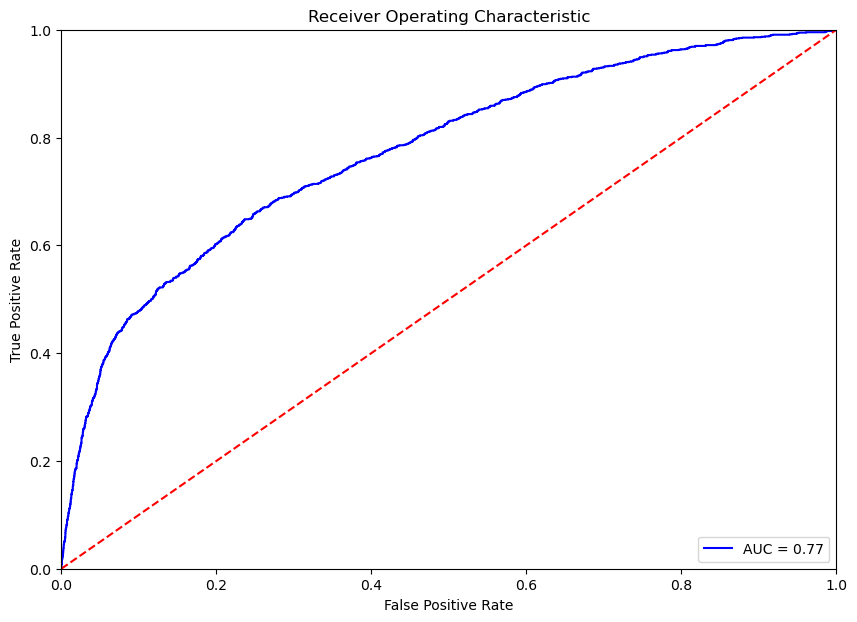

In [48]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

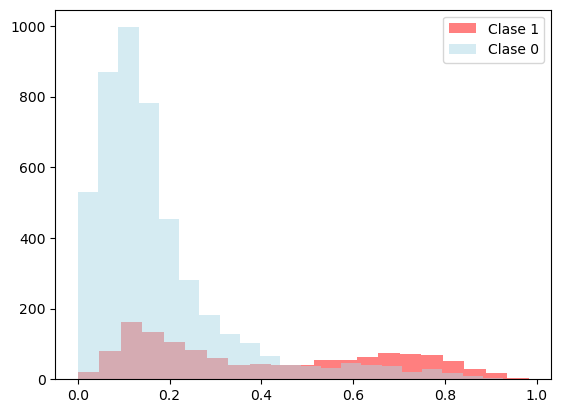

In [49]:
bins = 21
plt.hist(y_test_pred_prob_pos[:, 1], bins, density = 0, alpha=0.5, label='Clase 1', color='red')    
plt.hist(y_test_pred_prob_neg[:, 1], bins, density = 0, alpha=0.5, label='Clase 0', color='lightblue')
plt.legend(loc='best') 

### Umbralización de las predicciones

In [50]:
umbral = 0.5
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [51]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2))) 

Matriz de confusión
 [[4448  255]
 [ 800  497]]

Accuracy	0.82
Sensitividad	0.38
Precisión	0.66
